<h2 align="center">Classification.</h2>

<br>
<br>

In this round, you will learn how to formulate and solve a **classification problem**. Recall that **regression problems** are machine learning problems that involve data points with a numeric label such as the grayscale level of a pixel. In contrast, **classification problems** arise from data points whose labels have only a finite number of different values. The most simple classification problem is a **binary classification problem** where the label can take on only two distinct values such as $y=0$ vs. $y=1$. For example, $y$="picture includes a pedestrian crossing" vs. $y$="picture does not include pedestrian crossing". The label $y$ of a data point indicates to which class (or category) the data point belongs. 

We consider two widely used methods for solving classification problems: **logistic regression** and **decision trees**. These two methods differ in the choice of hypothesis space, i.e., the set of predictor functions $h(\mathbf{x})$ that map the features $\mathbf{x}$ of a data point to a predicted label $\hat{y}=h(\mathbf{x})$, which is hopefully a good approximation of the true label $y$. 

We mainly consider binary classification problems with data points having labels from a set of size two such as $\{0,1\}$ or {"image shows a crossing", "image shows no crossing"}. However, we will also discuss a simple approach to upgrade any binary classification method to solve classification problems with more than two label values such as {"image shows one crossing", "image shows more than one crossing", "image shows no crossing"}. We refer to classification problems with more than two label values (or categories) as **multi-class classification problems**. 

Learning goals

After this round, you should  

- be able to model "real-world" applications as classification problems by identifying features and labels. 
- be able to solve classification problems using logistic regression or decision trees. 
- be able to assess the reliability of classifications provided by logistic regression. 
- know about the differences between decision trees and logistic regression. 
- know how to extend binary classification methods to multi-class problems where labels can take on more than two different values. 


 Reading Material 

* Chapter Chapter 3.6 & 3.10 of course book [Machine Learning: The basics.]



 Additional Material 
* [video-lecture](https://www.youtube.com/watch?v=-la3q9d7AKQ) of Prof. Andrew Ng on classification problems and logistic regression 
* [video-lecture](https://www.youtube.com/watch?v=ZvaELFv5IpM) of Prof. Andrew Ng on extending binary classification methods to multi-class problems 

The Problem

<img src="N5_Classification/CrossingDetection.png" alt="Drawing" style="width: 600px;"/>

The city planners of Helsinki are regularly sending small airplanes to take high-resolution aerial photographs of different city areas. These aerial photographs are available via the open data service at https://kartta.hel.fi. It is important to monitor the condition of pedestrian crossings to determine if a renewal is necessary. To this end, we want to find those areas which contain a pedestrian crossing. 

In this exercise, you will learn how to use classification methods to determine if a particular area contains a pedestrian (zebra) crossing or not. We model this pedestrian crossing detection as a machine learning problem. The problem amounts to learn a predictor (or classifier) map $h(\mathbf{x})$ which delivers a predicted label $\hat{y} = h(\mathbf{x})$ which indicates if a certain area contains a pedestrian crossing or not. The classification is based on numeric features $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$ that are computed from an aerial photograph of the area in question.  

We will solve this binary classification problem using two different classification methods: logistic regression and decision trees. These two methods differ in the choice of hypothesis space. Decision tree classifiers use a flow-chart representation of the predictor function. In contrast, logistic regression uses the hypothesis space of linear predictor functions, which is also used in linear regression (see Notebook 3 - Regression). 

The difference between logistic and linear regression is the set of label values: the real numbers for linear regression and a set of size two {0,1} for logistic regression. Another difference between linear and logistic regression is the loss function. While linear regression is based on minimizing the squared error loss, logistic regression minimizes the logistic loss function, which is presented later. 

As you might already know, most machine learning problems (and methods) consist of three components: 

* some **data** (a bunch of data points, each of which is characterized by features and labels) 
* a **hypothesis space** (consisting of a set of predictor functions from features to labels)
* a **loss function** which is used to assess the quality of a particular predictor function 

In what follows, we will discuss particular choices for these three components to solve the pedestrian crossing detection problem.  

 The Data

ML methods aim at finding a good predictor map (or classifier) $h(\mathbf{x})$, which takes some features $\mathbf{x}$ as input and outputs an estimate for the label $y$ of the data point (which represents an area). To measure the quality of a particular predictor $h(\mathbf{x})$, we apply it on data points for which we know the true label values $y$. The basic principle of classification methods is to find (or learn) the best predictor function out of a set of computationally feasible functions (the hypothesis space). 

We have access to a data set consisting of $m=178$ data points $\big(\mathbf{x}^{(i)},y^{(i)}\big)$ for $i=1,\ldots,m$. Each data point represents a particular city area, and is characterized by several features $\mathbf{x}^{(i)}=\big(x^{(i)}_{1},\ldots,x^{(i)}_{n}\big)^{T}$ that are computed from an aerial photograph of that area. Each data point is also characterized by a label $y^{(i)}$ which has been found out by a city planner who manually inspected the areal photograph. 

We can use the labeled data to find a good predictor $h(\mathbf{x})$. In contrast to regression problems, where the ouput $h(\mathbf{x})$ of a predictor map is a (real) number, the predicted label $h(\mathbf{x})$ in a classification problem is a discrete value representing a particular class of data points. In this case it is customary to use the term **classifier** for the predictor $h(\mathbf{x})$.

A good classifier $h(\mathbf{x})$ should at least agree well with similar human judgment,

\begin{equation} 
\underbrace{y^{(i)}}_{\mbox{label by human}} \approx \underbrace{h(\mathbf{x}^{(i)})}_{\mbox{predicted label } \hat{y}^{(i)}}  \mbox{ for all } i =1,\ldots,m. 
\end{equation}

To sum up, 
* The dataset contains information about $m=178$ areas in the city of Helsinki.  
* For each area, a feature vector $\mathbf{x}^{(i)}$ containing $n=5$ features has been determined. 
* For each area, a city planner determined the class $y^{(i)}$ which is either 
     * $y^{(i)} = 0$ (area has no pedestrian crossing)
     * $y^{(i)}=1$ (area has one pedestrian crossing) 
     * $y^{(i)}=2$ (area has more than one pedestrian crossing)

<a id='demoboundary'></a>
<div class="alert alert-info">
    
 Demo. Load Data.

In the code below, we define a function `load_data` that loads the feature matrix $\mathbf{X}$ and label vector $\mathbf{y}$ of the zebra crossing dataset. The dataset has $m=178$ data points, and we load the five first features.
    
The parameter `binary_labels` defines whether we load three labels $\mathbf{y}$ as defined above, or convert the problem into a binary classification task by defining new labels with $y^{(i)}=1$ for areas with no pedestrian crossings and $y^{(i)}=0$ for areas with one or more crossings. The default value is `binary_labels=False`, i.e, the function returns the original multiclass labels.
</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import datasets
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
features_path = "N5_Classification/image_data.csv"
labels_path = "N5_Classification/image_labels.csv"

def load_data(binary_labels=False):
    X = pd.read_csv(features_path, header=None).to_numpy()
    y = pd.read_csv(labels_path, header=None).to_numpy().reshape(-1,)
    
    # select first 5 features
    X = X[:,:5]
    
    # convert labels to (new) binary labels
    # label for class 0 is y=1 and label for class 1 and class 2 is y=0.
    if binary_labels:
        y = (y == 0).astype(int)
        
    return X, y

After defining the function, we load the data and calculate the number of data points per class.

In [3]:
# Load the data
X, y = load_data()

# Print information of dataset
print(f"Shape of feature matrix: {X.shape} \nShape of label vector: {y.shape}")
print(f"Number of samples from Class 0: {sum(y == 0)}")
print(f"Number of samples from Class 1: {sum(y == 1)}")
print(f"Number of samples from Class 2: {sum(y == 2)}")

Shape of feature matrix: (178, 5) 
Shape of label vector: (178,)
Number of samples from Class 0: 59
Number of samples from Class 1: 71
Number of samples from Class 2: 48


Features and Labels 

Our goal is to classify an area based on features of an aerial photograph of that area. The $i$-th area is characterized by the features $x^{(i)}_{1},\ldots,x^{(i)}_{5}$ which we collect into the **feature vector** $\mathbf{x}^{(i)} = \big(x_{1}^{(i)},x_{2}^{(i)}, ... x_{5}^{(i)} \big)^{T} \in \mathbb{R}^{5}$. It will be convenient to stack the feature vectors $\mathbf{x}^{(i)} \in \mathbb{R}^{5}$, obtained for all data points $i=1,\dots,m$, into the feature matrix 

<a id='xm'></a>
\begin{equation*}
    \mathbf{X} = \big(\mathbf{x}^{(1)},\dots,\mathbf{x}^{(178)}\big)^T=\begin{bmatrix}
    x^{(1)}_{1}  & \dots & x^{(1)}_{5} \\
    \vdots & \ddots & \vdots\\
    x^{(178)}_{1} & \dots & x^{(178)}_{5}
    \end{bmatrix},\ \mathbf{X} \in \mathbb{R}^{m \times n},\ \text{where } m=178, n=5.
    \tag{1}
\end{equation*}

Besides its features $\mathbf{x}^{(i)}$, the $i$-th area is characterized by the category $y^{(i)} \in \{0,1,2\}$ which has been determined by a human expert. In principle, we could directly use the category $y^{(i)}$ as the label or quantity of interest. However, we will first consider the simpler binary classification problem, in which we attempt to predict whether a certain area has no pedestrian crossings or one or more pedestrian crossings. To this end, we define new labels with $y^{(i)}=1$ for areas with **no pedestrian crossings** and $y^{(i)}=0$ for areas with **one or more crossings**.

It will be convenient to collect the labels of all images into the label vector 

<a id='vy'></a>
\begin{equation*}
    \mathbf{y}=\big(y^{(1)},y^{(2)},\ldots,y^{(m)} \big)^{T} = \begin{bmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots\\
    y^{(m)}
    \end{bmatrix} \in \mathbb{R}^{m}.
    \tag{2}
\end{equation*}


a id='demoboundary'></a>
<div class="alert alert-info">
    
 Demo. Visualize Data Points.

The code snippet below loads the features $\mathbf{X}$ and labels $\mathbf{y}$ of the images and visualizes the data points on a scatter plot with respect to the first two features. The data points with no pedestrian crossings (new binary label is $y^{(i)} = 1$) are represented by circles and the data points with one or more crossings ($y^{(i)} = 0$) are represented by crosses.  
</div>

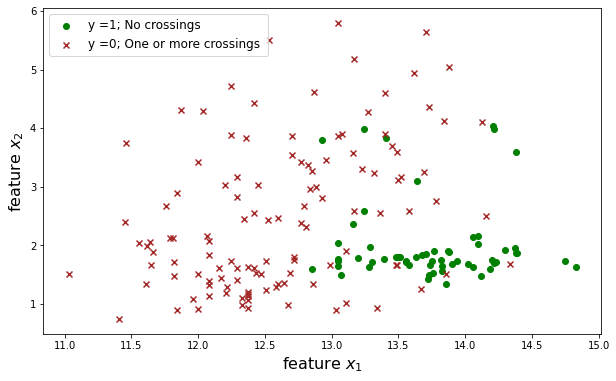

In [4]:
# Load data
X, y = load_data(binary_labels=True)

idx_1 = np.where(y == 1) # Indices of no pedestrian crossings images
idx_2 = np.where(y == 0) # Indices of one or more crossings images

# Plot scatterplot of dataset with different markings for classes
fig, axes = plt.subplots(figsize=(10, 6))
axes.scatter(X[idx_1, 0], X[idx_1, 1], c='green', marker ='o', label='y =1; No crossings')
axes.scatter(X[idx_2, 0], X[idx_2, 1], c='brown', marker ='x', label='y =0; One or more crossings ')

# Set axis labels and legend
axes.legend(loc='upper left', fontsize=12)
axes.set_xlabel('feature $x_1$', fontsize=16)
axes.set_ylabel('feature $x_2$', fontsize=16)
plt.show()

 Logistic Regression

<img src="N5_Classification/Log_Reg.png" alt="Drawing" style="width: 600px;"/>


Logistic regression is a classification algorithm that uses a linear function to classify data points into distinct categories. With simplicity in mind, we present the theory of  logistic regression in the case of a **binary** classification problem, in which the label only takes on values 0 or 1. Later in the notebook, we will consider extending the binary model to multiclass classification via a **one-versus-rest** scheme.

Logistic regression is a **probabilistic model** in the sense that we do not assume that the label $y$ of a data point is deterministically defined by the features $\mathbf{x}$. Instead, we assume that the features $\mathbf{x}$ are related to the probabilities of the data point having the different labels. The fundamental assumption of (binary) logistic regression is that the log-odds of a data point $\mathbf{x}$ having label $y=1$ are linearly related to the features of the data point:


\begin{equation}
\ln \frac{P(y=1)}{P(y=0)} = \ln \frac{P(y=1)}{1-P(y=1)} = w_0 + \mathbf{w}^T \mathbf{x} = w_0 + \sum_{i=1}^n w_i x_i
\tag{3}
\end{equation}

Here, the coefficient vector $\mathbf{w} = \big(w_1, w_2, \ldots, w_n \big)^T$ and intercept $w_0$ fully define the linear relationship between the features and the log-odds.

Observe that $w_0 + \mathbf{w}^T\mathbf{x} > 0$ when the data point is more likely to have the label $y=1$, and $w_0 + \mathbf{w}^T\mathbf{x} < 0$ when it is more likely that the label $y=0$. Consequently, the sign of the function $h(\mathbf{x}) = w_0 + \mathbf{w}^T \mathbf{x}$ can be used to predict the label $y$ of data points. The predicted labels outputted by the logistic regression model are

\begin{equation}
 \hat{y} = \begin{cases} 1 & \mbox{ for } w_0 + \mathbf{w}^T\mathbf{x} \geq 0 \\ 0 & \mbox{ for } w_0 + \mathbf{w}^T\mathbf{x} < 0 \end{cases}
 \tag{4}
\end{equation}

Given the model parameters, it is also relatively straightforward to calculate the estimated probabilities of the data point $\mathbf{x}$ belonging to each class. To calculate the probability of the data point having the label $y=1$ we solve for $P(y=1)$ in equation (3) to obtain

\begin{equation}
P(y=1) = \frac{1}{1 + \exp(-w_0 -\mathbf{w}^T \mathbf{x})}
\tag{5}
\end{equation}

Since the label can only take the values 0 and 1, we obtain $P(y=0)$ as the probability of the complement of $P(y=1)$:

\begin{equation}
P(y=0) = 1 - P(y=1) = 1 - \frac{1}{1 + \exp(-w_0 -\mathbf{w}^T \mathbf{x})} = \frac{1}{1 + \exp(w_0 + \mathbf{w}^T \mathbf{x})}
\tag{6}
\end{equation}


 Fitting a logistic regression model

When fitting a classification model, the goal is to find the parametrization of the model that results in the best predictions on the training set on average, as measured by some **loss function**. In classification problems we wish to maximize the **accuracy** of the classifier - the fraction of correctly predicted labels out of all data points. A seemingly natural choice of loss function in this case is the 0-1 loss, which incurs a loss of 1 if the prediction does not match the true label of a data point and 0 otherwise. This is due to the fact that minimizing the average 0-1 loss on the training set is equivalent to maximizing the accuracy. However, the average 0-1 loss cannot be minimized efficiently and is thus unusable in many applications. Most classification models consequently use some alternative loss function to optimize the classifier with respect to the model parameters.

A logistic regression model is fitted by minimizing the average **logistic loss**

\begin{equation}
\begin{aligned}
\mathcal{E}(\mathbf{w}) &=(1/m) \sum_{i=1}^{m}\big[ -y^{(i)}\ln\big(P(y=1)\big)-(1-y^{(i)})\ln\big(P(y=0)\big) \big] \\ &= (1/m) \sum_{i=1}^{m}\big[ -y^{(i)}\ln\big(\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1-\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big) \big]
\end{aligned}
\end{equation}

with respect to $\mathbf{w}$ and $w_0$. Here, the **logistic loss** of a single data point $\mathbf{x}^{(i)}$ with label $y^{(i)}$ is 

\begin{equation}
    \mathcal{L}(\mathbf{x}^{(i)},y^{(i)}) = -y^{(i)} \ln \big(\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1-\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big),
\end{equation}

where $\sigma(\mathbf{z})$ is the **sigmoid function**

\begin{equation}
\sigma(\mathbf{z}) = \frac{1}{1 + \exp{(\mathbf{-z})}}.
\end{equation}

A central feature of the binary logistic loss is that only one of the terms in the loss is non-zero for any data point. If $y=1$ the second term is multiplied by 0, and similarly, the first term is multiplied by zero if $y=1$. Hence, the shape of the loss function for a given data point is determined by its label.

It turns out that the average logistic loss is differentiable and convex and can thus be efficiently minimized using gradient based optimization algorithms, the principles of which are outside the scope of this course.

<b><font size=4>Summary. Logistic Regression</font></b>

* Linear functions can be used in classification task
* One of the popular linear classifier is logistic regression
* For linear predictor $h(\mathbf{x})= w_0 + \mathbf{w}^{T} \mathbf{x}$, we can assign a class label based on the sign of  $h(\mathbf{x})$: if $h(\mathbf{x})$ > 0 the assigned class is 1 and if $h(\mathbf{x})$ < 0 the assigned class is 0.
* We want to choose such a weight vector $\mathbf{w}$ that maximizes the probability (or likelihood) of the labels belonging to a specific class
* Maximizing this probability is similar to minimizing the logistic loss


<img src="N5_Classification/logreg1.jpg" alt="Drawing" style="width: 500px;"/>

<a id='demoboundary'></a>
<div class=" alert alert-info">
    
 Demo. Logistic Loss.

In this demo, we take a closer look at the logistic loss function and explore how its shape is affected by the label $y$ of a datapoint. To this end, we plot the logistic loss 

\begin{equation}
\mathcal{L}\big((\mathbf{x},y);\mathbf{w}\big) = -y\ln\big(\sigma\big( \mathbf{w}^{T} \mathbf{x} \big)\big)-(1-y)\ln\big(1-\sigma\big(\mathbf{w}^{T}\mathbf{x}\big) \big)
\end{equation}
      
for both $y=1$ and $y=0$ as a function of the predictor value $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. Recall that the value $\mathbf{w}^{T} \mathbf{x}$ gives the estimated log-odds of the true label $y$ being equal to $1$. Thus, large positive values of $\mathbf{w}^T \mathbf{x}$ represent a high degree of confidence in that $y=1$ and large negative values a high degree of confidence in that $y=0$.
</div>

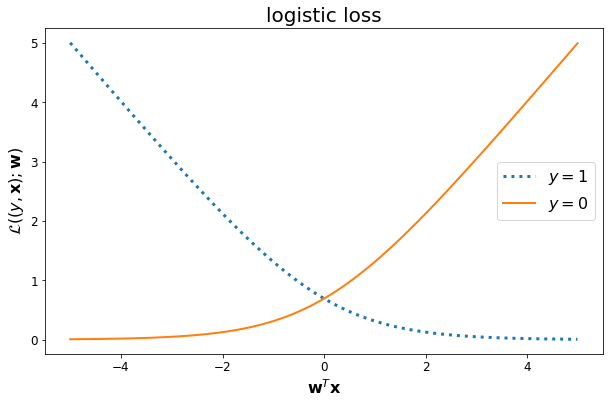

In [5]:
# Define sigmoid function according to formula (5)
def sigmoid_func(x):
    return 1/(1 + np.exp(-x))

# Choose values (w^T*x) for calculating loss 
range_x = np.arange(-5 , 5 , 0.01)

# Calculate logistic loss for y=1 and y=0
logloss_y1 = -np.log(sigmoid_func(range_x))
logloss_y0 = -np.log(1-sigmoid_func(range_x))

# Set fontsizes for matplotlib
plt.rc('legend', fontsize=16) 
plt.rc('axes', labelsize=16) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
     
# Plot the results, using the plot function in matplotlib.pyplot.
fig, axes = plt.subplots(1, 1, figsize=(10, 6)) 
axes.plot(range_x, logloss_y1, linestyle=':', label=r'$y=1$', linewidth=3.0)
axes.plot(range_x, logloss_y0, label=r'$y=0$', linewidth=2.0)

# Set axis labels and title
axes.set_xlabel(r'$\mathbf{w}^{T}\mathbf{x}$')
axes.set_ylabel(r'$\mathcal{L}((y,\mathbf{x});\mathbf{w})$')
axes.set_title("logistic loss", fontsize=20)
axes.legend()
plt.show()

We can see that the logistic loss for data points with the label $y=1$ (true label) is **decreasing** with respect to the predicted log-odds $\mathbf{w}^{T}\mathbf{x}$. This indicates that the loss is decreasing with an increasing confidence in $y=1$. In contrast, the loss for data points with the label $y=0$ is **increasing** with respect to the predicted log-odds, which means that lower log-odds are associated with a lower loss.

Standardizing data for logistic regression

When the features $\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_n$ of the dataset are of very different scales, the iterative optimization algorithms used for training the logistic regression model (and many other models) are often slow to find the optimal parameters, or at times, might even fail to do so.

In order to avoid these issues, it is common practice to **standardize** the dataset before using it to train the model. The feature matrix $\mathbf{X}$ is standardized feature-wise - that is, for all elements in each column, we subtract the column mean and divide by the standard deviation ($\sigma$) of the column to obtain the standard score:

\begin{equation}
    \mathbf{z}_j^{(i)} = \frac{\mathbf{x}_j^{(i)} - \bar{\mathbf{x}}}{\sigma(\mathbf{x})}.
\end{equation}

The result of this transformation is that the mean of each feature is 0, and the new values of the feature represent the deviation from the feature mean as measured by the number of standard deviations (+/-). Standardization can be performed in Scikit-learn in multiple ways, but the `StandardScaler` class is often convenient in practice.

 Standardization and model validation

When training models with the intention of validating them, it is a common pitfall to standardize the entire dataset before splitting the data or performing cross-validation. By doing this, the information in the validation set is used to transform the training and validation data. This is non-realistic since the validation set is supposed to represent real, new data. After all, you cannot use data you do not possess to calculate the means and standard deviations used to transform the training data!

The correct approach is to split the data before standardizing the training set. After the model has been trained on the standardized training data, we validate the model by standardizing the validation set **using the feature means and standard deviations from the training set**, and then calculating the validation error based on the standardized validation set. In cross-validation, this process is repeated for each split of the data.

Scikit-learn comes with a very useful tool for sequentially combining different estimators called a pipeline estimator. The pipeline estimator consists of multiple steps, of which all but the final one must be Scikit-learn transformers. The final step is typically a classifier or regressor. 

A pipeline is built by instantiating a `Pipeline` object with the command `Pipeline(steps)`, where `steps` is a list of tuples, whose first argument is the name (of your choice) of the step and the second is an instance of a Scikit-learn transformer/estimator. For example, we could build a model that standardizes the data before performing logistic regression by creating the object 

`pipe = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression())])`

Now, the object in `pipe` has a similar interface as the final estimator in the pipeline. By calling `pipe.fit(X_train,y_train)`, the model sequentially fits all its steps by utilizing the output of each step as the input for the next one. In our example, the model would first fit the `StandardScaler` on the feature matrix `X_train`, and then the logistic regression model using the standardized feature matrix outputted by `StandardScaler.transform(X_train)` and the label vector `y_train`. 

When later using the model to, e.g., make predictions using `pipe.predict(X_test)`, the data flows sequentially through the same steps. First, `X_test` is standardized using the mean and standard deviation of `X_train` that was used to fit the scaler, and then, the transformed data used to predict the labels of `X_test` by using `LogisticRegression.predict(X_test)`.

<a id='logisticregression'></a>
<div class=" alert alert-warning">
    
 Student Task. Logistic Regression. 

In this task, you will train and validate a logistic regression model using Scikit-Learn. Due to the issues regarding standardization discussed above, you will use a `Pipeline` model containing a `StandardScaler` and a `LogisticRegression` object for this.
    
In slightly more detail, the steps you need to take to solve this task are as follows:
    
- Create a `Standard_Scaler` and a `LogisticRegression` object. For the logistic regression, remember to define the parameter `C=1e6`. The parameter `C` represents the inverse regularization strength. By setting this to a very large value, we obtain a Logistic Regression model that is not regularized.

    
- Create the pipeline with `StandardScaler` and `LogisticRegression` as its steps using the previously created objects. 

    
- Fit the `Pipeline` object to training set.
    
    
- Use the function `Pipeline.score()` to calculate the training and test accuracy for your classification model and store these in `acc_train` and `acc_test` respectively.
</div>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(0)

# Load the features and labels
X, y = load_data(binary_labels=True)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)

### BEGIN STUDENT TASK ###




# YOUR CODE HERE
raise NotImplementedError()

# Print training and validation errors
print(f"Training accuracy: {acc_train}")
print(f"Test accuracy: {acc_test}")

In [ ]:
# Perform some sanity checks on the results
assert acc_train > 0.95, "Training accuracy is too low!"
assert acc_test < 0.89, "Test accuracy is too high!"
print('Sanity check tests passed!')


Based on what we learned last week, we can say that the logistic regression mildly overfits the training data. This claim is based on the training accuracy being significantly higher than the test accuracy.

Decision Boundary of Logistic Regression 

After we have fitted the logistic regression model and found the optimal model parameters $\mathbf{w}_{\rm opt}$ and $w_0$, we can predict the label of any new image with the feature vector $\mathbf{x} \in \mathbb{R}^n$ by

\begin{equation}
    \hat{y} = \begin{cases} 1 & \mbox{ for } w_0 + \mathbf{w}_{\rm opt}^T \mathbf{x} \geq 0 \\ 0 & \mbox{ for } w_0 + \mathbf{w}_{\rm opt}^T \mathbf{x} < 0 \end{cases}.
\end{equation}

The inequality $w_0 + \mathbf{w}_{\rm opt}^T \mathbf{x} \geq 0$ defines a closed half-space in $\mathbb{R}^n$, and the inequality $w_0 + \mathbf{w}_{\rm opt}^T \mathbf{x} < 0$ respectively defines an open half-space. These are separated by the hyperplane $w_0 + \mathbf{w}_{\rm opt}^T \mathbf{x} = 0$ that is called the **decision boundary** of the logistic regression classifier. By recalling that $w_0 + \mathbf{w}_{\rm opt}^T \mathbf{x}$ predicts the log-odds of the event $y=1$ in the logistic regression model, the decision boundary is naturally interpreted as the hyperplane on which the predicted odds for the labels are 1:1 - i.e. both labels are equally likely.

In two-dimensional space (e.g., in $\mathbb{R}^2$), the decision boundary is a line, whereas it is a plane in three-dimensional space. The hyperplane does not have an intuitive interpretation in higher dimensional space but still divides the entire space into two half-spaces.

For most training data, the decision boundary determined by logistic regression will not perfectly separate the training data points according to $y^{(i)}=1$ and $y^{(i)}=0$. Thus, we typically have training samples with the same true label that are on opposite sides of the decision boundary. However, the decision boundary will be chosen such that one class dominates on each side.

The decision boundary provides also a geometric interpretation of the magnitude $|w_0 + \mathbf{w}_{\rm opt}^{T} \mathbf{x}|$ as the normal distance of a data point with features $\mathbf{x}$ to the decision boundary. Thus, the larger $|w_0 + \mathbf{w}_{\rm opt}^{T} \mathbf{x}|$, the farther away is the data point from the decision boundary and, in turn, the more reliable is the predicted label $\hat{y}$ for this data point. On the other hand, if $|w_0 + \mathbf{w}_{\rm opt}^{T} \mathbf{x}| \approx 0$, then the data point with features $\mathbf{x}$ is close to the decision boundary, i.e., it is a border case which cannot be classified reliably.


<a id='demoboundary'></a>
<div class=" alert alert-info">
    
### Demo. Linear Decision Boundary.

In the code snippet below, we train a logistic regression model using only the first two features $x_{1}$ and $x_{2}$ of the images in the dataset. We then create two scatterplots containing the true and predicted labels respectively, as well as the decision boundary of the logistic regression classifier.
    
We can observe from the figure that while the decision boundary does not perfectly separate the data points with different true labels, the predicted labels are different on each side of the decision boundary, which is to be expected since the model effectively uses the boundary to predict the labels. 
</div>

In [ ]:
# Set random seed for reproducibility
np.random.seed(0)

# Load the features and labels
X, y = load_data(binary_labels=True) 

# Use only the first two features
X = X[:,:2]  

# Create and fit logistic regression 
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Get the weights of the fitted model
w0 = log_reg.intercept_
w = log_reg.coef_ 
w = w.reshape(-1)

# Calculate predictions
y_pred = log_reg.predict(X)

# Calculate the accuracy of predictions
accuracy = log_reg.score(X, y)
print(f"Accuracy of classification: {round(100*accuracy, 2)}%")

# Minimum and maximum values of features x1 and x2
x1_min, x2_min = np.min(X, axis=0)
x1_max, x2_max = np.max(X, axis=0)

# Compute x1, x2 values to plot the decision boundary h(x) = 0
# for data with 2 features this means w1x1 + w2x2 + bias = 0 --> x2 = (-1/w2)*(w1x1+bias)
x1_boundary = np.linspace(x1_min, x1_max, 100)
x2_boundary = (-1/w[1])*(x1_boundary*w[0] + w0)

options = [("Decision boundary and true labels", y), 
           ("Decision boundary and predicted labels", y_pred)]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))

for i, (title, label) in enumerate(options):   
    idx_1 = np.where(label == 1)[0] # index of each class 0 image (no crossings)
    idx_2 = np.where(label == 0)[0] # index of each not class 0 image (one or two crossings)
    # Plot datapoints
    axes[i].scatter(X[idx_1, 0], X[idx_1, 1], marker='x', s=50, label=r'$c^{(i)}=0$')
    axes[i].scatter(X[idx_2, 0], X[idx_2, 1], marker='o', s=50, label=r'$c^{(i)} \in \{1,2\}$')
    # Plot the decision boundary h(x) = 0
    axes[i].plot(x1_boundary, x2_boundary, color='green', label="Decision boundary")
    # Set lables and axes' limits
    axes[i].set_xlabel(r'$x_{1}$')
    axes[i].set_ylabel(r'$x_{2}$')
    axes[i].set_title(title, fontsize=16)
    axes[i].set_xlim(x1_min-.5, x1_max+.5)
    axes[i].set_ylim(x2_min-1, x2_max+1)
    axes[i].legend()
plt.show()

Multiclass Classification

So far, we have considered the problem of classifying an image as $y=1$ if it belongs to "class 0" (no crossings) and as $y=0$ if not, i.e., if it belongs to "class 1" or "class 2" (one or two crossings). We have solved this binary classification problem using logistic regression. However, our ultimate goal is to classify an image according to all three categories of the images. 

There is a simple but useful trick for extending any binary classification method to handle more than two different label values or classes. The idea behind this trick, which is known as **one vs. rest**, is quite simple: just split the multiclass classification problem into several subproblems, each subproblem being one binary classification problem. We then apply a binary classification method (such as logistic regression) to each subproblem and combine their results to obtain a predicted label for the multiclass problem. 

For the image classification problem, using the three classes "0", "1" or "2", we obtain the following binary classification subproblems: 

- subproblem 0: classify samples into "Class 0" $(y=1)$ vs. "not Class 0" $(y=0)$  
- subproblem 1: classify samples into "Class 1" $(y=1)$ vs. "not Class 1" $(y=0)$  
- subproblem 2: classify samples into "Class 2" $(y=1)$ vs. "not Class 2" $(y=0)$

Each subproblem amounts to testing if the image belongs to a particular class or not. The $k$th subproblem can be solved using logistic regression yielding a predictor $h^{(\mathbf{w}_{k})}(\mathbf{x})= (\mathbf{w}_{k})^{T} \mathbf{x}$. The predictor $h^{(\mathbf{w}_{k})}(\mathbf{x})= (\mathbf{w}_{k})^{T} \mathbf{x}$ indicates how likely the image belongs to the class $k$. We then assign the image to the class $k$ for which the confidence $h^{(\mathbf{w}_{k})}(\mathbf{x})$ is largest. 

 Example

Assume we want to classify a new data point (which is different from the $m$ data points in our dataset). To this end, we compute the feature vector $\mathbf{x}=(x_{1},x_{2},...,x_{5})^{T}$ of this new data point and apply the three subproblem predictors, yielding the following prediction values: 

* subproblem 0: $h^{(\mathbf{w}_{0})}(\mathbf{x}) = 0.1$ ("Class 0 vs. not Class 0")
* subproblem 1: $h^{(\mathbf{w}_{1})}(\mathbf{x}) = 0.4$ ("Class 1 vs. not Class 1") 
* subproblem 2: $h^{(\mathbf{w}_{2})}(\mathbf{x}) = 0.8$ ("Class 2 vs. not Class 2")

From these results, we can see that the predictor $h^{(\mathbf{w}_{2})}(\mathbf{x})$ for sub problem 3 (`Class 2` vs. `not Class 2`) yields the highest confidence. Hence, we classify this new data point as `Class 2`. 

<img src="N5_Classification/Regression_Zebra.png" alt="Drawing" style="width: 600px;"/>

<a id='demoboundary'></a>
<div class=" alert alert-info">
    
 Demo. Multiclass Classification.

The code snippet below illustrates how multiclass classification via logistic regression can be applied using scikit-learn. By defining the parameter `multi_class='ovr'` when initializing the `LogisticRegression` model, we make the logistic regression model use the one vs. rest scheme described above to perform multiclass classification.

We also use the function `LogisticRegression.predict_proba(X)` to obtain the predicted probabilities of the data points having each label. The function returns the probabilities in an array of shape `(m, n_labels)`, where `m` is the number of data points and `n_labels` the number of labels in the classification problem. That is, the $i$:th row of the array contains the predicted probabilities of the $i$:th data point having each label.

</div>


In [ ]:
# Set random seed for reproducibility
np.random.seed(0)

# Load features and labels with all labels
X, y = load_data()

# Fit logistic regression model
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X, y)

# Predict labels and probabilities
y_pred = log_reg.predict(X)
pred_probabilities = log_reg.predict_proba(X)

print(f"Labels: {set(y_pred)}")
print(f"Predicted probability of each label for the first data point: {pred_probabilities[0]}")
print(f"Predicted label for the first data point: {y_pred[0]}")
print(f"True label for the first data point: {y[0]}")

We can see from the output that, for the first datapoint, the probabilities for the labels $y=0,1,2$ are approximately $0.92$, $0.004$, and $0.08$ respectively. As such, the model predicts $y=0$ with high confidence.


 Regularization in logistic regression

Recall from the previous round that regularization is a technique with which we aim to improve the performance of our trained model on new data by minimizing a penalized average loss function. More specifically, we add a penalty term to the average loss that penalizes complex predictors more than simpler ones. The idea is that complex predictors are more likely to overfit the training data. 

In principle, regularization is performed the same way for logistic regression as in the Ridge and Lasso model considered last week. The difference is that the average logistic loss replaces the MSE in penalized loss function. A such, the function to minimize is 

\begin{equation}
\begin{aligned}
\mathcal{E}(\mathbf{w}) &= (1/m) \sum_{i=1}^{m}\big[ -y^{(i)}\ln\big(\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1-\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big) \big] + \alpha \mathcal{R}(\mathbf{w}),
\end{aligned}
\end{equation}

where $\alpha \mathcal{R}(\mathbf{w})$ is the penalty term. The regularization terms are generally of the same form as those considered in Notebook 4. For example, the default regularization term in Scikit-learn's logistic regression is $\mathcal{R}(\mathbf{w})=\|\mathbf{w}\|_2^2$.

In practice, the logistic regression model in Scikit-learn uses an inverse regularization coefficient $C$ instead of $\alpha$. Whereas $\alpha$ is used to control the magnitude of $\mathcal{R}(\mathbf{w})$ in the regularized loss function,  $C$ controls the weight of the average logistic loss instead:

\begin{equation}
\begin{aligned}
\mathcal{E}(\mathbf{w}) &= (C/m) \sum_{i=1}^{m}\big[ -y^{(i)}\ln\big(\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big)-(1-y^{(i)})\ln\big(1-\sigma(w_0 + \mathbf{w}^{T}\mathbf{x}^{(i)})\big) \big] + \mathcal{R}(\mathbf{w}).
\end{aligned}
\end{equation}

As such, small values of $C$ correspond to a heavily regularized model, while large values lead to weaker regularization. Next, we will attempt to find a good logistic regression model for the multiclass problem by tuning the inverse regularization strength $C$.

<a id='logisticregressiontuning'></a>
<div class=" alert alert-warning">
    
 Student Task. Tuning a Logistic Regression model. 

In this task, you will tune the inverse regularization strength $C$ of the logistic regression model to find the value that minimizes the validation error on the multi-class classification problem. To this end, you will use the class `GridSearchCV`, with which you familiarized yourself in the previous round.
    
Recall that the `GridSearchCV` class takes as arguments the model to be tuned and a dictionary of key-value pairs, where the key is the name of a tunable parameter and the value a list of candidate values for that parameter.
    
In this task, the model is a `Pipeline` estimator similar to the one you have used in "Student Task. Logistic Regression". When the model in `GridSearchCV` is a `Pipeline` object, the parameters in the parameter dictionary are named as `{step_name}__{parameter_name}`, where `{step_name}` is the name of the pipeline step whose parameter is tuned and `{parameter_name}` is the name of the parameter. Note **double underscore** in `{step_name}__{parameter_name}`
    
For example, if the model is 
    
`pipe = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(multi_class='ovr'))])`
    
the name of the parameter `C` in the parameter dictionary of `GridSearchCV` object is `log_reg__C`.
    
The steps you have to perform to solve this task are as follows:
    
- Create the `Pipeline` whose steps are standardization and logistic regression. The logistic regression model should utilize one-versus-rest for multiclass classification (`multi_class='ovr'`).
    
    
- Create a parameter dictionary containing one key-value pair containing the name and candidate values `C_candidates` of the parameter `C` of the logistic regression model. See above how the parameter is named when the logistic regression model is part of a `Pipeline`.
    
    
- Create a `GridSearchCV` object with the `Pipeline` and the parameter dictionary as inputs. Also, pass the parameters `refit=True`, `cv=5` and `return_train_score=True` to the constructor. Then, perform the 5-fold cross-validation by calling the `GridSeachCV.fit(X_trainval,y_trainval)` function of your `GridSearchCV` object.
    
  
- Store the average training and validation accuracies in the variables `acc_train` and `acc_val` respectively. Remember that these can be retrieved from the dictionary `GridSearchCV.cv_results_` by using the keys `mean_train_score` and `mean_test_score`. 


- Store the best model (i.e. model with the optimal `C`) in the variable `best_model`. The best model can be obtained from the attribute `GridSearchCV.best_estimator_`.
    
**Hint:** See [here](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html) for an example on combining `Pipeline` and `GridSearchCV`.
</div>

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set random seed for reproducibility
np.random.seed(0)

# Split dataset into train-val and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

# Candidates for the inverse regularization strength
C_candidates = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

### STUDENT TASK ###
# YOUR CODE HERE
raise NotImplementedError()



# Print training and validation errors
print(f"Training accuracy: {acc_train}")
print(f"Validation accuracy: {acc_val}")
print(f"Best model: {best_model}")

In [ ]:
# Perform some sanity checks on the results
assert len(acc_train) == len(C_candidates), "acc_train is of the wrong size!"
assert len(acc_val) == len(C_candidates), "acc_val is of the wrong size!"
assert best_model.get_params()['log_reg__C'] == 1, "The optimal parameter value is wrong!"
print('Sanity check tests passed!')


In [ ]:
# Plot training and validation accuracies for the different values of C
plt.figure(figsize=(8,5))
plt.plot(C_candidates, acc_train, '-o', label='Training accuracy')
plt.plot(C_candidates, acc_val, '-o',label='Validation accuracy')

plt.xscale('log')
plt.title("Accuracy vs. inverse regularization strength")
plt.xlabel('Inverse regularization strength C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

If you have completed the task correctly, you should see plot similar to this one:

<img src="N5_Classification/gridsearch.png" alt="Drawing" style="width: 500px;"/>

Confusion Matrix

Computing the accuracy as the fraction of correctly classified data points for which $\hat{y}^{(i)}=y^{(i)}$ is only one possible way to check how well you did. In some applications, the accuracy score is not a very useful quality measure. In particular, this is true for applications where the different classes occur with significantly different frequencies ("imbalanced data"). A more fine-grained assessment of a classification method is provided by computing a confusion matrix. 

A [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix) is a matrix of shape `(n_labels, n_labels)`, in which the value of the element in row $i$ and column $j$ represents the number of data points with the true label corresponding to index $i$ that are predicted by the classifier as having the label corresponding to index $j$. As such, the elements along the diagonal ($i=j$) show the amount of correctly classified data points for each label.

Using a confusion matrix, it is possible to analyze the classifier's performance for each possible value of the true label. For example, one might discover that the classifier performs particularly well or poorly on some specific classes.

It is often convenient to calculate a so-called **normalized confusion matrix** instead of the standard one. In the normalized confusion matrix, the element in the $i$th row and $j$th column contains the proportion of data points with the true label corresponding to $i$ that are classified as having the label corresponding to $j$. The rows of this matrix sum up to 1. The normalization makes it easier to compare the classifier's performance for the different true labels when they occur with different frequencies.

<a id='logregconf'></a>
<div class=" alert alert-info">
    
 Demo. Confusion Matrix. 

The confusion matrix is commonly visualized as an `n_labels x n_labels` grid of cells, where the cell colors are related to the number/proportion of data points in the corresponding element in the confusion matrix. This greatly enhances the confusion matrix's readability, especially when the number of labels (and the size of the matrix) is large.
    
In scikit-learn, a confusion matrix can be visualized using the function [`sklearn.metrics.plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn-metrics-plot-confusion-matrix). The required inputs to the function are a fitted classifier, the feature matrix `X`, and the label vector `y`. One can also define other parameters for the function that control the appearance and type of the plotted confusion matrix. The function returns the object `display`, where the confusion matrix can be accessed with `display.confusion_matrix`. 
    
In the code snippet below, we use the `plot_confusion_matrix()` function to plot both, standard and normalized confusion matrix, based on **test set** for the multi-class logistic regression classifier saved in the previous task in a variable `best_model`. In addition to the required input parameters, we pass the desired class names for the confusion matrix in the parameter `display_labels`, the desired color map in the parameter `cmap`, as well as the `axes` object we wish to plot the confusion matrix on in the parameter `ax`. Furthermore, we pass a value in the parameter `normalize`, which indicates whether or not the confusion matrix should be normalized or not.
    
</div> 

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Define class labels for confusion matrices
classes = ['Class 0','Class 1','Class 2']

# Define plotting options (title, normalization, axes index)
options = [("Confusion matrix", None, 0),
           ("Normalized confusion matrix", 'true', 1)]

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Create subplots (1 row, 2 columns)
plt.rc('font', size=14)  # Set fontsize
for title, normalize, ax_idx in options:
    # main parameters of function `plot_confusion_matrix` are:
    # trained classifier (best_model), data (X_test, y_test)
    disp = plot_confusion_matrix(best_model, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=axes[ax_idx])
    disp.ax_.set_title(title)

plt.show()

From the confusion matrices, we can see that our logistic regression model classifies data points with the true labels $y=0$ and $y=1$ pretty well, whereas accuracy for the last class is much lower. Observe that since the number of data points in each class is slightly different, the normalized confusion matrix makes it much easier to interpret the model's comparative performance on data points with different labels.

Decision Trees

We will learn another classification method that is referred to as **decision trees**. A decision tree is a flowchart-like representation of a predictor function $h(\mathbf{x})$ that reads in the features $\mathbf{x}$ of a data point and outputs a predicted label $\hat{y}=h(\mathbf{x})$. The decision tree consists of **nodes**, which represent certain tests, e.g., "is the first feature $x_{1}$ larger than 10?". The nodes are connected by **branches** that correspond to the result or outcome of a test (there is one outgoing branch for each possible answer of a test node). By following the branches, we end up at a leaf node (which has no further branches). Each leaf node is associated with a certain output value $h(\mathbf{x})$. The picture below depicts a decision tree for wine classification with test nodes colored blue and leaf nodes colored orange and green. 

<img src="N5_Classification/Decision_Tree.png" alt="Drawing" style="width: 450px;"/>

Now, you might wonder how do we choose the test nodes? The basic idea is the same as in linear or logistic regression, we try out many different decision trees (using different choices of test nodes) and pick the one which results in the smallest average loss incurred on some labeled training data points $(\mathbf{x}^{(i)},y^{(i)})$. However, in contrast to logistic regression, this learning or optimization problem involves searching over a discrete set of different configurations of test nodes instead of a continuous convex optimization of the model parameters. This makes training decision trees computationally more challenging than logistic regression that allows using efficient convex optimization methods (such as gradient-based methods). However, clever approaches to learning good decision trees with a reasonable amount of computational resources have been developed, although details of these are outside the scope of this course. 

Video on the basic concept of decision trees:

- https://www.youtube.com/watch?v=9w16p4QmkAI

If you want to learn more details about decision trees, beyond the requirements of this course, we refer you to: 

- https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
- https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain
- https://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html

<a id='demotreeboundary'></a>
<div class=" alert alert-info">

### Demo. Decision Boundary of a Decision Tree.

In the code below, we train a decision tree on the first two features of the dataset, and plot the decision boundary of the resulting classifier in a scatter plot along with the data. The data points with $y^{(i)} = 1$ are indicated by "x" while all samples with true label $y^{(i)} =0$ are indicated by "o".

The algorithms that are used to train a decision tree are not affected by variables of different scales. As such, we do not need to standardize the data using pipelines when using decision tree models.

</div>

In [ ]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    
    """
    Function with which to plot decision boundary
    """
    
    # step size
    h = 0.02
    # min-max values of features x1 and x2
    x1_min, x1_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    x2_min, x2_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    # x1, x2 values for plotting 
    x1 = np.arange(x1_min, x1_max, h)
    x2 = np.arange(x2_min, x2_max, h)
    # create grid of x1,x2 values (all possible combinations of x1 and x2 values)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    # get predictions for each x1,x2 pair
    Z = clf.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
    Z = Z.reshape(x1x1.shape)
    
    idx_1 = np.where(Y == 1)[0] # index of each class 0 iamge.
    idx_2 = np.where(Y == 0)[0] # index of each not class 0 image
    
    plt.figure(figsize=(10,6))
    plt.contourf(x1x1, x2x2, Z, cmap=cmap, alpha=0.25)
    plt.contour(x1x1, x2x2, Z, colors='k', linewidths=0.5)
    plt.scatter(X[idx_1, 0], X[idx_1, 1], marker='x', label='class 0')
    plt.scatter(X[idx_2, 0], X[idx_2, 1], marker='o', label='class 1', edgecolors='k')
    plt.xlabel(r'Feature 1')
    plt.ylabel(r'Feature 2')

In [ ]:
# Set random seed
np.random.seed(0)

# Load data and select only the first two features
X, y = load_data(binary_labels=True)
X = X[:,:2]

clf = DecisionTreeClassifier(criterion='entropy')   # define object "clf" which represents a decision tree
clf.fit(X, y)                    # learn a decision tree that fits well the labeled images  
y_pred = clf.predict(X)          # compute the predicted labels for the images

# Calculate the accuracy score of the predictions
accuracy = clf.score(X, y)
print(f"Accuracy: {round(100*accuracy, 2)}%")

# Plot decision boundary
plot_decision_boundary(clf, X, y)
plt.show()

The trained model is perfectly accurate, but the decision function looks quite peculiar. Do you think that this model would generalize well to new data?

Next, you will train a decision tree and calculate the training and validation errors to assess the generalization capabilities of the model.

<a id='dtclassifier'></a>
<div class=" alert alert-warning">
    
 Student Task. Decision Tree Classifier.
    
In this student task, you will train a decision tree classifier on a set of training data using Scikit-learn `DecisionTreeClassifier` class, and calculate the models training and test accuracies. The accuracies are stored in the variables `acc_train` and `acc_test` respectively. \
When creating the decision tree object you should set the parameter `criterion='entropy'`. The argument `criterion` corresponds to a particular choice for the loss function to be used. For background information consult the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
    
The process of training a decision tree model is similar to that of other classifiers (and regressors) in scikit-learn, so you will probably not need extra details this time! 
    
**Hint**: the accuracy can by easily calculated by using the `.score` function of the decision tree object. 
</div>

In [ ]:
# Set random seed
np.random.seed(0)

# Load data to feature matrix X and label vector y 
X, y = load_data(binary_labels=True)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)

### STUDENT TASK ###


# YOUR CODE HERE
raise NotImplementedError()

# Print training and validation error
print(f"Training error: {acc_train}")
print(f"Test error: {acc_test}")

In [ ]:
# Perform some sanity checks on the outputs
assert acc_train > 0.99, "Training accuracy is too low."
assert acc_test > 0.9, "Test accuracy is too low."
assert acc_test < 1, "Test accuracy is too high."
print('Sanity check tests passed!')


We can see that the trained decision tree severely overfits the training data. While the accuracy of the model is perfect on the training data, it performs worse on the test set. This is in fact very common when using decision trees, and should be addressed by tuning some of the hyperparameters of the decision tree to obtain a model with better generalization capability. 

<a id='dtvis'></a>
<div class=" alert alert-info">
    
 Demo. Visualizing the decision tree. 
    
One of the advantages of the decision tree classifier is its interpretability. In the code snippet below, we visualize the fitted decision tree using the `plot_tree()` function from the `tree` module in scikit-learn.
    
In each node of the tree, the top row describes the decision rule of the cell. For instance, the root node splits the dataset based on whether the value of the 1st feature is larger or smaller than $12.905$. The `samples` field indicates how many data points are allocated to that particular node, and the `value` field indicates how these are distributed with respect to the true labels. The `class` field specifies the class to which the data points in the node are classified at that level of the tree. The leaf nodes of the tree define the final labels of the data points.
    
</div>

In [ ]:
from sklearn.tree import plot_tree

feature_cols = ["x" + str(i) for i in range(len(X[0,:]))] # needed for visualization
label_names = ['0', '1']

# Visualize the decision tree
plt.figure(figsize=(16,14))
plot_tree(clf, filled=True, rounded=True, feature_names=feature_cols, class_names=label_names)
plt.show()

Difference between logistic regression and decision trees

The two classification methods, logistic regression and decision trees, both aim at learning a good predictor $h(\mathbf{x})$ which allows determining the label $y$ of the data point based on some features $\mathbf{x}$. A major difference of the two models is the form of the predictor function $h(\mathbf{x})$ they use. Logistic regression uses linear predictor functions $h(\mathbf{x})=w_0 + \mathbf{w}^{T} \mathbf{x}$ (which are thresholded to get discrete label predictions $\hat{y}$). 

In contrast to the linear functions used in logistic regression, decision trees use predictor functions that are obtained from flow charts (decision trees) consisting of various tests on the features $\mathbf{x}$. Using sufficiently large decision trees allows to represent highly non-linear functions $h(\mathbf{x})$. In particular, decision trees can perfectly separate data points (according to their labels), which cannot be separated by any straight line (which are the only possible decision boundaries for logistic regression). 

<table><tr>
    <td><img src='N5_Classification/lr1.png' style="width: 500px;"></td>
    <td><img src='N5_Classification/tree1.png' style="width: 500px;"></td>
</tr></table>

Left side - the green line is a decision boundary of logreg. The color of the dots represent true labels (blue or red) and the color of the background is classification according to logreg. The intensity of background color represents confidence in a given label (darker red/blue - high confidence, light red/blue - lower confidence, white - 50/50 chance).



Right side - Depicted zones represent decision tree's flowchart/boundaries
In the right plot, background color represents classification by the tree: red zones are zones where datapoints predicted label is "red": blue zones - predicted labels are "blue"


<table><tr>
    <td><img src='N5_Classification/Screenshot 2022-02-21 at 11.07.36.png' style="width: 500px;"></td>
    <td><img src='N5_Classification/image (8).png' style="width: 500px;"></td>
</tr></table>    



Quiz questions

<a id='QuestionN5_1'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Question N5.1. 

<p>How many features can be used for logistic regression?</p>

<ol>
  <li>None</li>
  <li>One (1)</li>
  <li>Thirteen (13)</li>
  <li>Any number of features (given enough computational resources)</li>
</ol> 

</div>

In [ ]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
#answer_N5_Q1  =.

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# This cell is for tests

assert answer_N5_Q1 in [1,2,3,4], '"answer_N5_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


<a id='QuestionN5_2'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Question N5.2. 

<p>When performing logistic regression, we are trying to....</p>

<ol>
  <li>Solve a minimum likelihood problem.</li>
  <li>Maximize the average logistic loss.</li>
  <li>Minimize the average logistic loss.</li>
</ol> 

</div>

In [ ]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
#answer_N5_Q2  = .

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# This cell is for tests

assert answer_N5_Q2 in [1,2,3], '"answer_N5_Q2" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


<a id='QuestionN5_3'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Question N5.3. 

<p>Consider an arbitrary set of $m$ labeled data points having two features $\mathbf{x}^{(i)} \in \big(x^{(i)}_{1},x^{(i)}_{2}\big)^{T}$ and a binary label $y^{(i)} \in \{0,1\}$. How large can the sample size $m$ be such that we can for sure always find a straight line such that all points $\mathbf{x}^{(i)}$ with the same label $y^{(i)}$ lie on the same side (but not on top) of the line. </p>

<ol>
  <li>$m \leq 2$</li>
  <li>$m = 3$</li>
  <li>$m = 4$</li>
  <li>$m = 6$</li>
</ol> 

</div>

In [ ]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
#answer_N5_Q3  = .

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# This cell is for tests

assert answer_N5_Q3 in [1,2,3,4], '"answer_N5_Q3" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')
